## Hyperparameter Optimization

### General Libraries

In [46]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

### Constructing the classifier

In [47]:
# read the data
df = pd.read_csv("./data/Latest_Data_Science_Salaries.csv",sep=";")

# check data frame shape
df.shape

(3300, 11)

In [48]:
def preprocessing(df):
    """ 
        Cette methode permet de faire le preprocessing d'un dataset
    """
    # colsReturns = getColumns(df,df.columns)

    # newData = df[colsReturns]

    newData = pd.get_dummies(df)

    return newData

In [49]:
df = preprocessing(df)

In [50]:
def detect_outliers(df_detect_out) :
    '''
        Fonction permettant de detecter les valeurs aberrantes
        @params df_detect_out est de type dataframme
    '''
    q1 = np.quantile(df_detect_out, 0.25)
    q3 = np.quantile(df_detect_out, 0.75)
    eiq= q3 - q1
    li = q1 - (eiq * 1.5)
    ls = q3 + (eiq * 1.5)
    i  = list(df_detect_out.index[(df_detect_out<=li) | (df_detect_out>=ls)])
    val= list(df_detect_out[i])
    return i, val

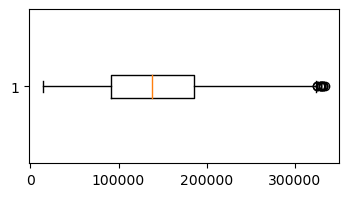

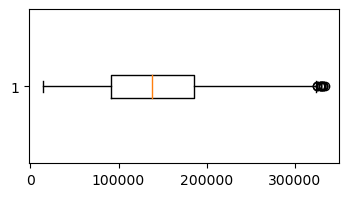

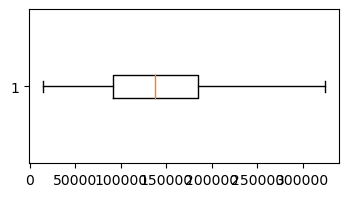

In [51]:

index, val = detect_outliers(df["Salary"])
df.drop(index, axis=0, inplace=True)

plt.figure(figsize=((4, 2)))
plt.boxplot(df["Salary"], vert=False)
plt.show()


index, val = detect_outliers(df["Salary"])

plt.figure(figsize=((4, 2)))
plt.boxplot(df["Salary"], vert=False)
plt.show()


index, val = detect_outliers(df["Salary"])
df.drop(index, axis=0, inplace=True)
plt.figure(figsize=((4, 2)))
plt.boxplot(df["Salary"], vert=False)
plt.show()

In [52]:
from sklearn.model_selection import train_test_split

# splitting data
X = df.drop(["Salary in USD","Salary"], 1)
y = df[["Salary in USD"]]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,shuffle=False)

In [53]:
y

,Salary in USD
0,210000
1,165000
2,185900
3,129300
4,140000
...,...
3293,28369
3294,165000
3296,151000
3297,105000


In [54]:
y.value_counts()

Salary in USD
100000           56
200000           50
150000           50
120000           46
110000           36
                 ..
147500            1
79197             1
147800            1
79178             1
133766            1
Length: 1225, dtype: int64

In [55]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelEnc = LabelEncoder()
X["Year"] = labelEnc.fit_transform(X["Year"])
X

,Year,Job Title_AI Architect,Job Title_AI Developer,Job Title_AI Programmer,Job Title_AI Scientist,Job Title_AWS Data Architect,Job Title_Analytics Engineer,Job Title_Analytics Engineering Manager,Job Title_Applied Data Scientist,Job Title_Applied Machine Learning Engineer,...,Employee Residence_Turkey,Employee Residence_Ukraine,Employee Residence_United Arab Emirates,Employee Residence_United Kingdom,Employee Residence_United States,Employee Residence_Uzbekistan,Employee Residence_Viet Nam,Company Size_Large,Company Size_Medium,Company Size_Small
0,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3293,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3294,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3296,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3297,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,shuffle=False)


In [57]:
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### Hyperparameter Optimization

#### Defining hyperparameter space

In [58]:
hyperparameters = {
    'alpha': [0.01, 0.1, 1.0, 10.0],        # Valeurs à essayer pour le paramètre alpha
    'fit_intercept': [True, False],          # Essayer avec et sans l'intercept
    'max_iter': [500, 1000, 2000],          # Essayer différentes valeurs pour le nombre maximal d'itérations
    'tol': [0.001, 0.01],                  # Essayer différentes valeurs pour la tolérance
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag', 'saga'],  # Essayer différentes méthodes de résolution
    'random_state': [42]                     # Fixer la graine aléatoire pour la reproductibilité des résultats
}

#### Random search

In [59]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge

# perform random search
clf_rs = RandomizedSearchCV(Ridge(), hyperparameters, cv = 5, n_iter = 20)
random_search = clf_rs.fit(X_train, y_train)

# identify best parameters from random search
random_search.best_params_

{'tol': 0.01,
 'solver': 'cholesky',
 'random_state': 42,
 'max_iter': 1000,
 'fit_intercept': False,
 'alpha': 10.0}

In [60]:
model_1 = Ridge(
                alpha=random_search.best_params_["alpha"],
                fit_intercept=random_search.best_params_["fit_intercept"],
                max_iter=random_search.best_params_["max_iter"],
                tol=random_search.best_params_["tol"],
                solver=random_search.best_params_["solver"],
                random_state=random_search.best_params_["random_state"]

                
                )
model_1.fit(X_train,y_train)
model_1.score(X_test,y_test)

0.4970473629321047

#### Grid search

In [61]:
# from sklearn.model_selection import GridSearchCV

# # perform grid search
# clf_gs = GridSearchCV(Ridge(), hyperparameters, cv = 3)
# grid_search = clf_gs.fit(X_train, y_train)

# # identify best parameters from grid search
# grid_search.best_params_

In [62]:
# model_ridge1 = Ridge(
#                     alpha=random_search.best_params_["alpha"],
#                     fit_intercept=random_search.best_params_["fit_intercept"],
#                     max_iter=random_search.best_params_["max_iter"],
#                     tol=random_search.best_params_["tol"],
#                     solver=random_search.best_params_["solver"],
#                     random_state=random_search.best_params_["random_state"]
#                 )
# model_ridge1.fit(X_train,y_train)
# model_ridge1.score(X_test,y_test)

#### Bayesian Optimization

In [63]:
from skopt import BayesSearchCV

# perform bayesian optimization
clf_bo = BayesSearchCV(Ridge(), hyperparameters, cv =3,  n_iter = 20)
bayes_search = clf_bo.fit(X_train, y_train)

# identify best parameters from bayesian optimization
bayes_search.best_params_

OrderedDict([('alpha', 10.0),
             ('fit_intercept', False),
             ('max_iter', 1000),
             ('random_state', 42),
             ('solver', 'saga'),
             ('tol', 0.0021706091046280636)])

In [64]:
model_ridge2 = Ridge(
                    alpha=random_search.best_params_["alpha"],
                    fit_intercept=random_search.best_params_["fit_intercept"],
                    max_iter=random_search.best_params_["max_iter"],
                    tol=random_search.best_params_["tol"],
                    solver=random_search.best_params_["solver"],
                    random_state=random_search.best_params_["random_state"]
                )
model_ridge2.fit(X_train,y_train)
model_ridge2.score(X_test,y_test)

0.4970473629321047